In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# **Download dataset from Kaggle**

In [2]:
!pip install opendatasets -q

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nishadisasanthika14
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 21.3MB/s]

In [5]:
data = pd.read_csv("male-female-height-and-weight/Test set.csv")

# **Data Preprocessing**

In [6]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [7]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [8]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [9]:
X = data.drop(['Sex'], axis=1)
y = data['Sex']

In [10]:
X.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [11]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [13]:
y[:5]

,Sex
0,0
1,1
2,1
3,1
4,0


In [14]:
y.dtype

dtype('O')

In [15]:
y = y.astype('int')

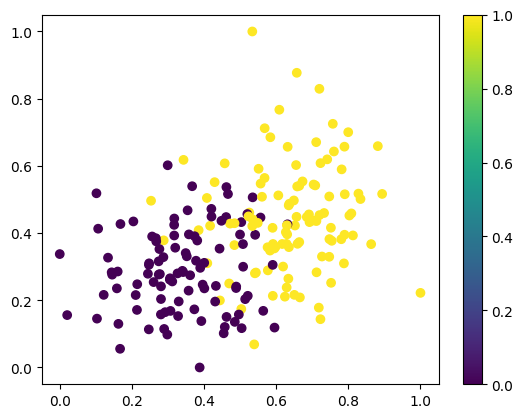

In [16]:
plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape

((164, 2), (41, 2))

# **Model Building**

# OPTION 1

In [19]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(X_train, y_train, epochs=epoch_number)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5403 - loss: 0.6535
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.5094  
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8345 - loss: 0.3685 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8448 - loss: 0.3237 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3900 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8513 - loss: 0.3229 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8592 - loss: 0.3231 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3053 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8519 - loss: 0.2883 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.3073 


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,093 (113.65 KB)

 Trainable params: 9,697 (37.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,396 (75.77 KB)

In [21]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.08486525],
       [0.95476264],
       [0.97598755],
       [0.15560304],
       [0.9161055 ]], dtype=float32)

In [23]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


# OPTION 2

In [24]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["accuracy"])

# train the model
epoch_number = 10
history = model.fit(X_train, y_train, epochs=epoch_number)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5482 - loss: 0.6414
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.4611 
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8557 - loss: 0.3123 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8912 - loss: 0.3091 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.4156 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8151 - loss: 0.5443 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8493 - loss: 0.3373 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8421 - loss: 0.3812 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 0.3213 
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8467 - loss: 0.3301 


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,144 (113.85 KB)

 Trainable params: 9,714 (37.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,430 (75.90 KB)

In [26]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[0.78858495, 0.21141504],
       [0.01447655, 0.9855234 ],
       [0.0055066 , 0.99449337],
       [0.6601937 , 0.33980626],
       [0.01830086, 0.9816991 ]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [28]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


# **Evaluate Model**

In [29]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8979 - loss: 0.3113  


[0.32357358932495117, 0.8780487775802612]

In [30]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.82608694>

In [31]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

# **Variation of loss and accuracy**

<Axes: >

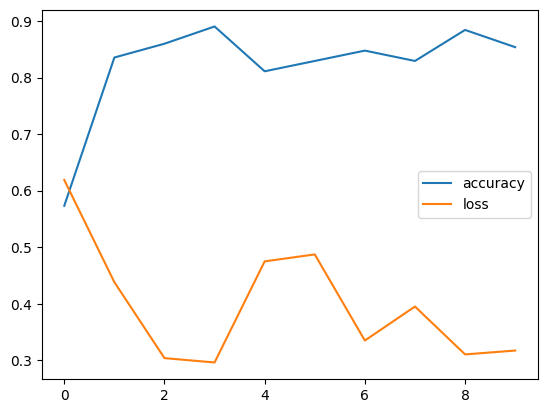

In [32]:
pd.DataFrame(history.history).plot()